
                                CSE 676 - DEEP LEARNING - FINAL PROJECT

                        Solving Sudoku Using Image Recognition & Deep Learning

                                    > TEAM MEMBERS
                                    >> - Prajvala Rajendra Sonawane
                                    >> - Mrunmayee Rane 
                                    >> - Nikita Satyajit Desai



1. Installing the required libraries

In [ ]:

# !pip install numpy
# !pip install tensorflow
# !pip install keras
# !pip install pillow

2. Importing the required python libraries

In [1]:
import numpy as np
import cv2 as cv
import glob
import os
import re
import pickle
import keras
import copy
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt
# Keras datasets and model layers
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils.np_utils import to_categorical
from keras import backend as K
from keras.utils import np_utils
from google.colab.patches import cv2_imshow
# keras optimizers and sklearn utiity
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
from load_data import *
from model import *
from load_data import *
from utility.pickle import *
from utility.plot import *
from process_image import *
from sudoku import *

3. Setting the hyperparameters

In [3]:

batch_size = 128
epochs = 500
no_of_classes = 10
input_shape = (32, 32, 1)
activation_functions = ["relu", "softmax"]
learning_rate = 0.001
epsilon = 1e-08
epsilon_decay = 0.0
loss_type = "categorical_crossentropy"
digitclassifier_model_filename = "cfk-digit-recognition-500epochs.h5"
sudoku_shape = (9,9,1)

4. Loading the Chars74k dataset saved in dataset folder
> Reference link =>  http://www.ee.surrey.ac.uk/CVSSP/demos/chars74k/





In [18]:
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset_root_folder = "/content/drive/MyDrive/DL Project/input/Digits/Digits"
X = [] # Loading data for training and testing
Y = [] # Loading output true values - ground truth for calculating loss

In [ ]:
X, Y = load_data(no_of_classes=no_of_classes, dataset_root_folder= dataset_root_folder)

Dataset Loaded !


In [ ]:
print(f"Length of the loaded dataset : {len(X)}")

Length of the loaded dataset : 885


In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X,Y,test_size=0.05)
train_X, valid_X, train_y, valid_y = train_test_split(train_X,train_y,test_size=0.2)
print("Training Set Shape = ",train_X.shape)
print("Validation Set Shape = ",valid_X.shape)
print("Test Set Shape = ",test_X.shape)

Training Set Shape =  (672, 32, 32, 3)
Validation Set Shape =  (168, 32, 32, 3)
Test Set Shape =  (45, 32, 32, 3)


5. Preprocess the dataset

In [ ]:
data_dict = {
    "train": train_X,
    "validation" : valid_X,
    "test" : test_X
}

x_train, x_valid , x_test = preprocess(data_dict)


Hello
(672, 32, 32, 3)
(672, 32, 32, 3)


In [ ]:
y_train = to_categorical(train_y, no_of_classes)
y_valid = to_categorical(valid_y, no_of_classes)
y_test = to_categorical(test_y, no_of_classes)

6. Get the deep learning model defined for image recognition

In [ ]:
# Load model for digit image recognition

model_digit_identifier = get_imageRecognition_model(input_shape= input_shape, activation_functions= activation_functions,padding = "same", output_shape= no_of_classes)

model_optimizer = tf.keras.optimizers.RMSprop(
    learning_rate= learning_rate,
    rho=0.9,
    # momentum=0,
    epsilon = epsilon,
    decay = epsilon_decay,
    centered=False,
    name="RMSprop"
    # **kwargs
)
model_digit_identifier.compile(optimizer = model_optimizer,loss= loss_type ,metrics=['accuracy'])

7. Train the model

In [ ]:
# Train the model
history = model_digit_identifier.fit(x_train, y_train,batch_size=batch_size,epochs=10,verbose=1,validation_data=(x_valid, y_valid))
print("Training the digit classifier model is completed successfully")


Epoch 1/10
6/6 [==============================] - 16s 2s/step - loss: 2.2806 - accuracy: 0.1711 - val_loss: 2.2363 - val_accuracy: 0.1845
Epoch 2/10
6/6 [==============================] - 16s 2s/step - loss: 2.2338 - accuracy: 0.1830 - val_loss: 2.2931 - val_accuracy: 0.1845
Epoch 3/10
6/6 [==============================] - 13s 2s/step - loss: 2.2690 - accuracy: 0.2068 - val_loss: 2.1721 - val_accuracy: 0.1845
Epoch 4/10
6/6 [==============================] - 13s 2s/step - loss: 2.1491 - accuracy: 0.2411 - val_loss: 2.1074 - val_accuracy: 0.3690
Epoch 5/10
6/6 [==============================] - 13s 2s/step - loss: 2.1697 - accuracy: 0.3393 - val_loss: 1.8115 - val_accuracy: 0.4702
Epoch 6/10
6/6 [==============================] - 13s 2s/step - loss: 1.7555 - accuracy: 0.3914 - val_loss: 1.5928 - val_accuracy: 0.5595
Epoch 7/10
6/6 [==============================] - 14s 2s/step - loss: 1.5620 - accuracy: 0.5030 - val_loss: 1.4658 - val_accuracy: 0.5238
Epoch 8/10
6/6 [==================

In [ ]:

# Save the trained model in digitclassifier_model_filename

model_digit_identifier.save(digitclassifier_model_filename)
print(f"Saved the digit recognition model as {digitclassifier_model_filename}")

# Save the history metrics as well if needed for analysis later


Saved the digit recognition model as cfk-digit-recognition-500epochs.h5


In [ ]:
# Pickle - store the model metrics for use later
save_metrics(history = history, pickle_file_name="train_history_10epochs.pckl",path_to_save= "/content/pickled_files")
print(f"Saved model history at /pickled_files/train_history_10epochs")

Saved model history at /pickled_files/train_history_10epochs


In [ ]:
# Reload the model metrics for plotting training loss and accuracy
loaded_history = load_metrics("/content/pickled_files/train_history_10epochs.pckl")

In [ ]:
loaded_history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

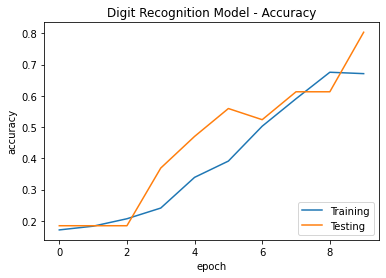

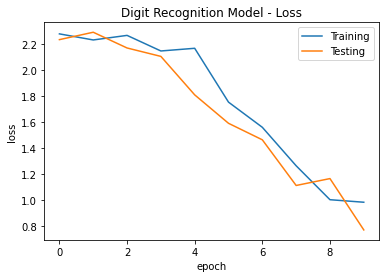

In [ ]:
# Plot the metrics
plot(loaded_history)

In [ ]:
# Loading the saved model
model_digit_identifier = keras.models.load_model(digitclassifier_model_filename)

In [ ]:
# Testing the pre-trained model on test data
testing_results = model_digit_identifier.evaluate(x_test, y_test, verbose=0)
print('Testing loss:', testing_results[0] , "Test accuracy:", testing_results[1])


Testing loss: 0.718481719493866 Test accuracy: 0.800000011920929


In [ ]:
# y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

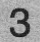

prediction shape: (10,)
Predicted value of digit :  3  Prediction :  0.49199274


In [ ]:
# Sample testing on a single digit image

# model1 = keras.models.load_model('/content/mnist-200epochs.h5')
# model1 = keras.models.load_model('/content/mnist-analytics-cfk-2.h5')
model1 = model_digit_identifier
file = "/content/dataset/51.jpg"

image3 = cv.imread(file, cv.IMREAD_GRAYSCALE)
cv2_imshow(image3)
if (image3 is not None and image3.size == 0):
     print("Error reading file")
    #  return -1
image3 = cv.resize(image3, (32, 32))
image3 = image3.astype('float32')
image3 = image3.reshape(1, 32, 32, 1)
image3 = 255-image3
image3 /= 255

# actual3 = np.array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])
test3 = np.array(image3)

prediction3 = model1.predict(test3[:1])[0]
print("prediction shape:", prediction3.shape)

print("Predicted value of digit : ", np.argmax(prediction3)," Prediction : ", max(prediction3))

Part 2 - Loading image and preprocessing

Enter path of input file : 
/content/sudoku90.png


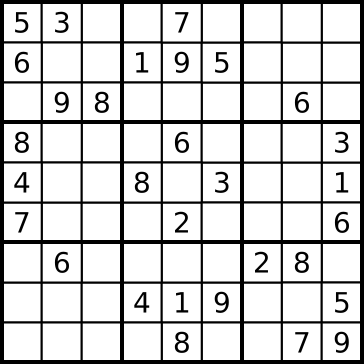

In [ ]:
print("Enter path of input file : " )
file_path = input() # Included sample image input file path /content/sudoku90.png

input_image = cv.imread(file_path)

if (input_image is not None and input_image.size == 0):
     print("Error reading file")


cv2_imshow(input_image)

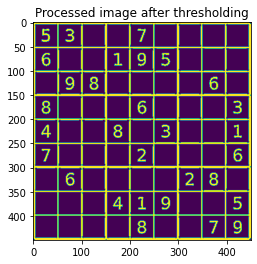

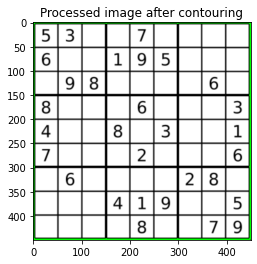

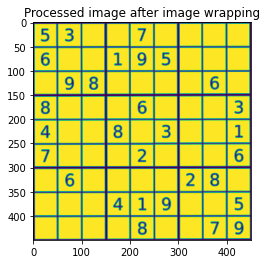

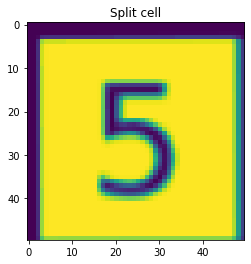

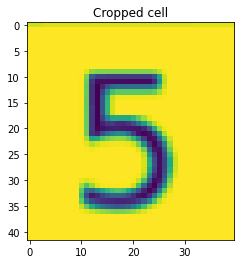

In [ ]:

img = cv.resize(input_image, (450,450))

threshold_image = preprocess_image(img)
plt.figure()
plt.title('Processed image after thresholding')
plt.imshow(threshold_image)
plt.show()


plt.figure()
plt.title('Processed image after contouring')
contour_fig1, contour_fig2 ,contour, hierarchy = contouring(img, threshold_image)
plt.imshow(contour_fig1)
plt.show()

plt.figure()
plt.title('Processed image after image wrapping')
wrapped_image = wrap(img, contour, contour_fig2)
plt.imshow(wrapped_image)
plt.show()

plt.figure()
plt.title('Split cell')
sudoku_cell = splitcells(wrapped_image)
plt.imshow(sudoku_cell[0])
plt.show()

plt.figure()
plt.title('Cropped cell')
cropped_sudoku = crop(sudoku_cell)
plt.imshow(cropped_sudoku[0])
plt.show()

In [ ]:
# Write into files

path = './cropnum'
for i in range(len(cropped_sudoku)):
    x = cv.imwrite(os.path.join(path ,f"{i}.jpg"),cropped_sudoku[i])


In [ ]:
# Load model for predictions
model1 = keras.models.load_model('/content/mnist-analytics-cfk-1.h5')

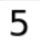

Predicted :  5


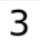

Predicted :  3


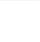

Predicted :  0


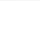

Predicted :  0


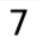

Predicted :  7


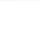

Predicted :  0


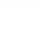

Predicted :  0


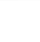

Predicted :  0


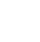

Predicted :  0


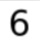

Predicted :  6


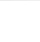

Predicted :  0


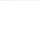

Predicted :  0


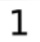

Predicted :  1


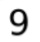

Predicted :  9


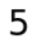

Predicted :  5


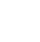

Predicted :  0


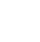

Predicted :  0


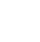

Predicted :  0


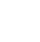

Predicted :  0


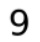

Predicted :  9


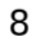

Predicted :  8


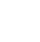

Predicted :  0


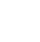

Predicted :  0


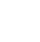

Predicted :  0


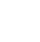

Predicted :  0


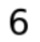

Predicted :  6


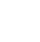

Predicted :  0


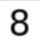

Predicted :  8


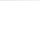

Predicted :  0


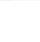

Predicted :  0


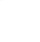

Predicted :  0


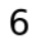

Predicted :  6


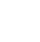

Predicted :  0


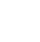

Predicted :  0


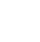

Predicted :  0


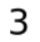

Predicted :  3


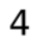

Predicted :  4


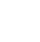

Predicted :  0


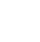

Predicted :  0


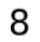

Predicted :  8


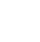

Predicted :  0


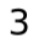

Predicted :  3


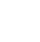

Predicted :  0


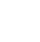

Predicted :  0


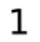

Predicted :  1


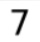

Predicted :  7


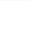

Predicted :  0


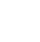

Predicted :  0


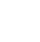

Predicted :  0


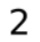

Predicted :  2


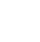

Predicted :  0


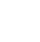

Predicted :  0


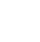

Predicted :  0


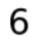

Predicted :  6


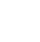

Predicted :  0


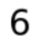

Predicted :  6


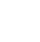

Predicted :  0


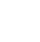

Predicted :  0


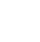

Predicted :  0


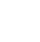

Predicted :  0


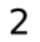

Predicted :  2


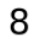

Predicted :  8


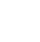

Predicted :  0


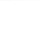

Predicted :  0


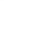

Predicted :  0


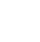

Predicted :  0


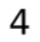

Predicted :  4


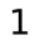

Predicted :  1


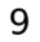

Predicted :  9


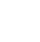

Predicted :  0


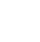

Predicted :  0


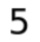

Predicted :  5


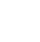

Predicted :  0


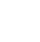

Predicted :  0


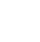

Predicted :  0


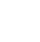

Predicted :  0


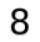

Predicted :  8


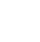

Predicted :  0


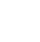

Predicted :  0


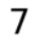

Predicted :  7


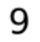

Predicted :  9


In [ ]:
# Loop over all cells of the input image and predict each digit using the trained prediction model
# For blank cell we will predict digit as zero to differentiate


pred = []
num = re.compile(r'(\d+)')
img_dict = {int(num.split(k)[1]): k for k in glob.glob('./cropnum/*.jpg')}
sorted_img_dict = dict(sorted(img_dict.items()))
for key, path in sorted_img_dict.items():
    
  img = cv.imread(path)
  
  cv2_imshow(img)
  img = img[:,:,0]
  height,width=img.shape[:2]
  start_row,start_col=int(width*0.35),int(height*0.35)
  end_row,end_col=int(width * 0.75),int(height * 0.75)


  cropped=img[start_row:end_row,start_col:end_col]
  # img = cropped
  # cv2_imshow(cropped)
  binarr = np.where(cropped>127,255,0)
  img = cv.resize(img, (32, 32))
  img= img.astype('float32')
  img = img.reshape(1, 32, 32, 1)
  img = 255-img
  img /= 255
 
    
  test = np.array(img)
  # print(np.sum(binarr == 255))
  if(np.sum(binarr == 255) >= 260):
    max_prediction = 0
  else:
    prediction = model1.predict(test[:1])[0]
    # print(prediction)
    max_prediction = np.argmax(prediction)
  print("Predicted : ",max_prediction)
  pred.append(max_prediction)

In [ ]:
n=9
grid = [pred[i:i + n] for i in range(0, len(pred), n)]
print ('\n'.join(' '.join(map(str, x)) for x in grid))

5 3 0 0 7 0 0 0 0
6 0 0 1 9 5 0 0 0
0 9 8 0 0 0 0 6 0
8 0 0 0 6 0 0 0 3
4 0 0 8 0 3 0 0 1
7 0 0 0 2 0 0 0 6
0 6 0 0 0 0 2 8 0
0 0 0 4 1 9 0 0 5
0 0 0 0 8 0 0 7 9


In [ ]:
print(" The Sudoku puzzle after digit recognition is :")


 The Sudoku puzzle after digit recognition is :


In [ ]:
grid

[[5, 3, 0, 0, 7, 0, 0, 0, 0],
 [6, 0, 0, 1, 9, 5, 0, 0, 0],
 [0, 9, 8, 0, 0, 0, 0, 6, 0],
 [8, 0, 0, 0, 6, 0, 0, 0, 3],
 [4, 0, 0, 8, 0, 3, 0, 0, 1],
 [7, 0, 0, 0, 2, 0, 0, 0, 6],
 [0, 6, 0, 0, 0, 0, 2, 8, 0],
 [0, 0, 0, 4, 1, 9, 0, 0, 5],
 [0, 0, 0, 0, 8, 0, 0, 7, 9]]

Part 3 - Training a deep learning model for solving sudoku puzzle

In [6]:
# Loading dataset sudoku.csv from Kaggle
# Example path = "/content/dataset/sudoku.csv" OR "/content/drive/MyDrive/DL Project/input/sudoku.csv"
x_train, x_test, y_train_1, y_test = load_sudoku_data("/content/drive/MyDrive/DL Project/input/sudoku.csv")

changed 42


In [ ]:
y_train_1

In [ ]:
print(x_train.shape)

(800000, 9, 9, 1)


In [ ]:
# Train the data
solver_model = get_Sudoku_model(input_shape=(9,9,1), activation_functions= activation_functions, padding="same")
adam = tf.keras.optimizers.Adam(lr= learning_rate)
solver_model.compile(loss='sparse_categorical_crossentropy', optimizer=adam)
# solver_model.compile(optimizer = adam,loss=tf.keras.losses.SparseCategoricalCrossentropy())
solver_model.fit(x_train, y_train, batch_size=32, epochs=2)

In [ ]:
# Saving the model

In [4]:
sudoku_model = keras.models.load_model('model/sudoku.model')

In [5]:
grid = [[5, 3, 0, 0, 7, 0, 0, 0, 0],
 [6, 0, 0, 1, 9, 5, 0, 0, 0],
 [0, 9, 8, 0, 0, 0, 0, 6, 0],
 [8, 0, 0, 0, 6, 0, 0, 0, 3],
 [4, 0, 0, 8, 0, 3, 0, 0, 1],
 [7, 0, 0, 0, 2, 0, 0, 0, 6],
 [0, 6, 0, 0, 0, 0, 2, 8, 0],
 [0, 0, 0, 4, 1, 9, 0, 0, 5],
 [0, 0, 0, 0, 8, 0, 0, 7, 9]]
 

In [6]:
game = grid
print(game)

[[5, 3, 0, 0, 7, 0, 0, 0, 0], [6, 0, 0, 1, 9, 5, 0, 0, 0], [0, 9, 8, 0, 0, 0, 0, 6, 0], [8, 0, 0, 0, 6, 0, 0, 0, 3], [4, 0, 0, 8, 0, 3, 0, 0, 1], [7, 0, 0, 0, 2, 0, 0, 0, 6], [0, 6, 0, 0, 0, 0, 2, 8, 0], [0, 0, 0, 4, 1, 9, 0, 0, 5], [0, 0, 0, 0, 8, 0, 0, 7, 9]]


In [10]:
answer = solve_sudoku(game, sudoku_model=sudoku_model,  sudoku_shape= sudoku_shape)
print('Solution :')
print(answer)

Solution :
[[5 3 4 6 7 8 9 1 2]
 [6 7 2 1 9 5 3 4 8]
 [1 9 8 3 4 2 5 6 7]
 [8 5 9 7 6 1 4 2 3]
 [4 2 6 8 5 3 7 9 1]
 [7 1 3 9 2 4 8 5 6]
 [9 6 1 5 3 7 2 8 4]
 [2 8 7 4 1 9 6 3 5]
 [3 4 5 2 8 6 1 7 9]]


In [14]:
final_check_column = np.sum(answer, axis=1)

print(final_check_column)
for x in range(len(final_check_column)):
  if(final_check_column[x] != 45):
    print("Wrong Output")
    break;
  if(x == len(final_check_column)-1):
    print("VUHOOOOOO! SODOKU SOLVED AT LIGHTENING SPEED")


final_check_row = np.sum(answer, axis=0)
print(final_check_row)
for x in range(len(final_check_row)):
  if(final_check_row[x] != 45):
    print("Wrong Output")
    break;
  if(x == len(final_check_row)-1):
    print("VUHOOOOOO! SODOKU SOLVED AT LIGHTENING SPEED")


[45 45 45 45 45 45 45 45 45]
VUHOOOOOO! SODOKU SOLVED AT LIGHTENING SPEED
[45 45 45 45 45 45 45 45 45]
VUHOOOOOO! SODOKU SOLVED AT LIGHTENING SPEED
